# MSBD5010 Assignment 1

# Overview
In the assignment, you need to complete 4 image processing tasks. Please read instructions and comments of the skeleton carefully before writing your own codes.

For each function, the code skeleton is provided and your task is to **fill in the missing block** within. Any modifications outside of this area will result in 0 score penalty.
```
######### start of your code #########

######### end of your code #########
```


### **Please note that**

*   **DO NOT** edit the code outside the answering area.
*   you are **NOT** allowed to use libraries or any pre-defined image processing/computer vision functions other than those provided in the preparation module.
*   Any violations will result in 0 score penalty of the corresponding function.



# Preparation

1. Upload test images (lena.png, task4.png, ...) to to the Files 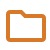 (the bottom option in the left menu bar) if you are using Colab.

2. Run the following code to import the libraries that you are allowed to use.

The helper function `read_img` is provided to read a gray image file and convert it to a `numpy.array` object of size [x, y].

The helper function `read_rgb` is provided to read a RGB image file and convert it to a `numpy.array` object of size [x, y, 3] (used only in task 1).

**DO NOT EDIT** this code cell.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read_img(img_path):
    gray_img = Image.open(img_path).convert('L')
    img_data = np.asarray(gray_img)
    return img_data

def read_rgb(img_path):
    img = Image.open(img_path).convert('RGB')
    img_data = np.asarray(img)
    return img_data

# Task 1 Gamma Correction
Complete the function `gamma_correction` to apply power-law (gamma) transformation to the input image with the given parameter gamma.

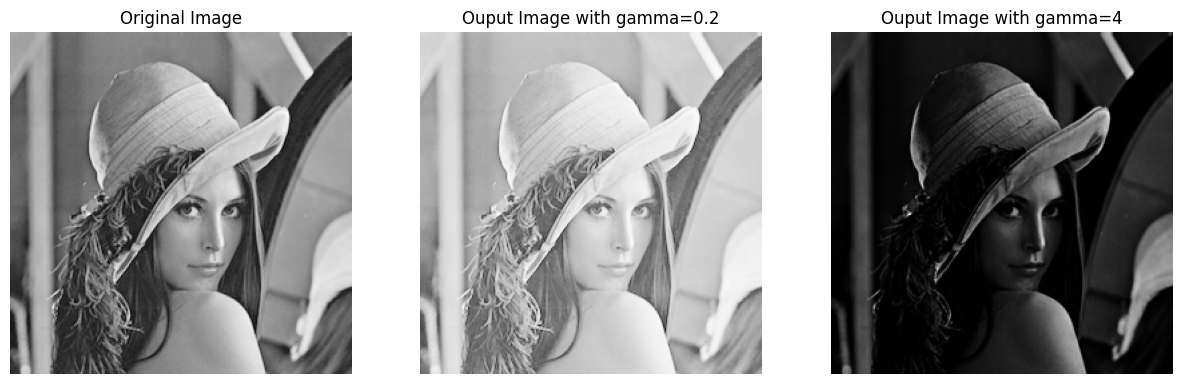

In [5]:
def gamma_correction(image, gamma):
      # Ensure input is a float array to avoid rounding issues.
      image = image.astype(np.float32)

      ######### start of your code #########
      # Power-Law (Gamma) Transformations: s = cr^\gamma, where c and \gamma are positive constants
      # Initialize c as 1
      c = 1
      image = c * np.power(image, gamma)

      ######### end of your code #########
      return image

img = read_img('lena.png')
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

output1 = gamma_correction(img, 0.2)
plt.subplot(1, 3, 2)
plt.imshow(output1, cmap='gray')
plt.title('Ouput Image with gamma=0.2')
plt.axis('off')

output2 = gamma_correction(img, 4)
plt.subplot(1, 3, 3)
plt.imshow(output2, cmap='gray')
plt.title('Ouput Image with gamma=4')
plt.axis('off')
plt.show()

# Task 2 Edge Detection
Complete the function `sobeledge` to find edges automatically.

The algorithm is as follows:
1. Obtain the **gradient image** by detecting edges of the input image using sobel.
2. Initialize a variable `t` as the mean between the maximum and minimum values of the **gradient image**.
3. Threshold the gradient map using `t`, which produces two sub-regions `G1` (consisting of pixels with values >= `t`) and `G2` (consisting of pixels with values < `t`).
4. Compute the average intensity values `m1` and `m2` for regions `G1` and `G2`.
5. Update the threshold value `t = 0.5 * (m1 + m2)`.
6. Repeat *step 3 - 5* ten times or until the change of `t` in successive iterations is smaller than 5%.
7. Return the **gradient image**, and the binary **edge image** (with `G1` assigned value 0 and `G2` assigned 255).

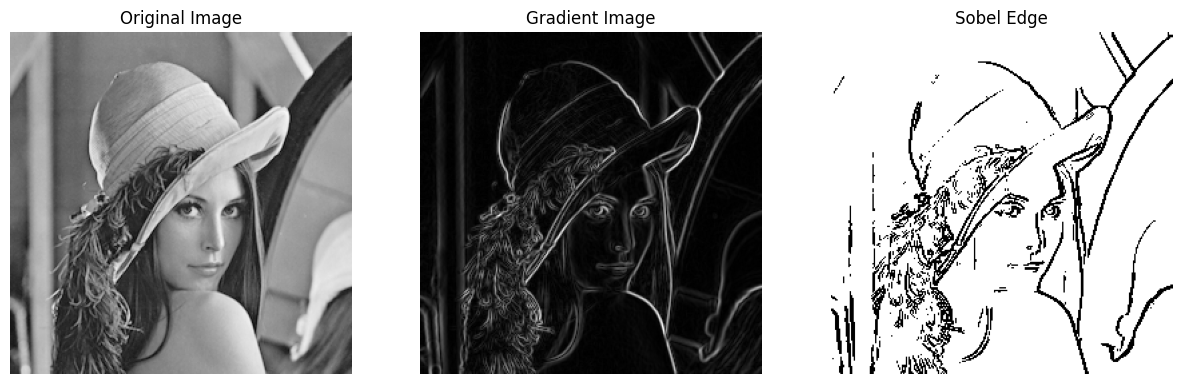

In [33]:
def sobeledge(image):
    # The output gradient image
    gradient_magnitude = np.zeros_like(image)

    # The output binary edge image (containing only 0 or 255)
    edge = np.zeros_like(image)

    # Ensure input is a float array to avoid rounding issues
    image = image.astype(np.float32)

    ######### start of your code #########
    
    max_col, max_row = image.shape

    ### Apply padding to image boundaries ###
    padded_image = np.zeros((max_col+2, max_row+2))
    padded_image = padded_image.astype(np.float32)
    padded_image[1:max_row+1, 1:max_col+1] = image

    # Padding by replicating nearest pixel to provide smoother output
    for r in (0, max_row+1):
        for c in range(1, max_col+1):
            padded_image[r, c] = padded_image[r+1, c] if r == 0 else padded_image[r-1, c]
    
    for c in (0, max_col+1):
        for r in range(1, max_row+1):
            padded_image[r, c] = padded_image[r, c+1] if c == 0 else padded_image[r, c-1]
    
    # Handle corners by taking averages
    padded_image[0, 0] = np.average((padded_image[0,1], padded_image[1,0]))
    padded_image[0, max_col+1] = np.average((padded_image[0,max_col], padded_image[1,max_col+1]))
    padded_image[max_row+1, 0] = np.average((padded_image[max_row+1,1], padded_image[max_row,0]))
    padded_image[max_row+1, max_col+1] = np.average((padded_image[max_row+1,max_col], padded_image[max_row, max_col+1]))
    
    ### Finished padding ###

    # Initialize Sobel filters
    Gx, Gy = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]), np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

    # Change gradient magnitude to store floats to allow smoother result
    gradient_magnitude = gradient_magnitude.astype(np.float32)

    # Calculate Gradient Magnitude using Sobel operator
    for r in range(0, max_row):
        for c in range(0, max_col):
            kernel = padded_image[r:r+3, c:c+3]
            gradient_magnitude[r, c] = np.sqrt(np.square(np.sum(Gx * kernel)) + np.square(np.sum(Gy * kernel)))

    # Initialize t as the mean btw. the max. and min. value
    t = np.average((gradient_magnitude.max(), gradient_magnitude.min()))
    
    # Loop 10 times or until delta t < 5%
    for i in range(0, 10):

        # Treshold with t to produce G1 and G2
        G1, G2 = gradient_magnitude[gradient_magnitude >= t], gradient_magnitude[gradient_magnitude < t]

        # Calculate average intensity for G1 and G2
        m1, m2 = np.mean(G1), np.mean(G2)

        old_t = t
        t = 0.5 * (m1 + m2)
        
        # Check if % change is < 5%
        if abs((t-old_t)/old_t) < 0.05:
            break

    edge[gradient_magnitude >= t], edge[gradient_magnitude < t]= 0, 255

    ######### end of your code #########
    
    return gradient_magnitude, edge

img = read_img('lena.png')
gradient, edge = sobeledge(img)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gradient, cmap='gray')
plt.title('Gradient Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edge, cmap='gray')
plt.title('Sobel Edge')
plt.axis('off')
plt.show()

# Task 3 Unsharp Masking and Highboost filtering
Complete the function `highboost`.

The parameter `image` of type `numpy.array` is the gray image to be processed, `kernel_size` is the kernel size of the filter, `sigma` is the standard deviation of the Gaussian blurring, `k` is the coefficient adding the mask to the original image.

Return `blurred_image` as the Gaussian filtered image and `filtered_image` as the bilateral filtered output.

[[117.21039  108.83845  100.46874  ... 118.387024 122.0717    95.23776 ]
 [108.937706 105.60545  100.760284 ... 127.52012  133.07779  102.494545]
 [105.00567  101.28923  101.3158   ... 125.33819  118.579956  79.232864]
 ...
 [ 32.97197   34.00715   32.846386 ...  54.931507  63.777946  60.136917]
 [ 27.62734   31.317669  30.774967 ...  62.634502  70.65807   68.20956 ]
 [ 29.27937   37.75885   31.150513 ...  68.81819   72.75228   80.019875]]
[[ 89.92603   78.93767   66.26164  ...  88.33956   94.37009   68.33456 ]
 [ 79.22192   74.03209   66.71234  ... 100.9236   108.4029    78.46811 ]
 [ 71.29312   67.54511   67.479385 ... 101.73603   95.25827   55.08339 ]
 ...
 [ 22.206251  23.510456  21.809347 ...  38.2741    46.214146  42.035076]
 [ 18.24943   21.530107  19.861113 ...  44.719944  53.321075  51.23053 ]
 [ 20.779888  28.560778  20.347235 ...  50.517334  55.891853  63.79548 ]]
[[76.247856 63.768753 49.692516 ... 73.16823  80.016884 54.921986]
 [64.09156  58.197662 50.204365 ... 87.14001 

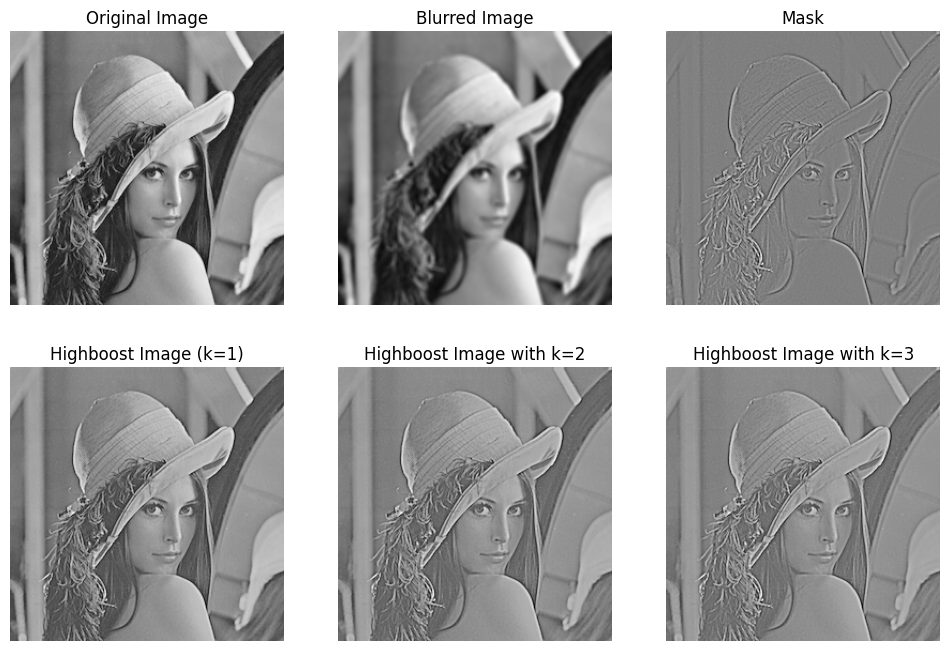

In [71]:
def highboost(image, kernel_size=5, sigma=4, k=1):
    # The output highboost filtered image
    filtered_image = np.zeros_like(image)

    # The output Gaussian Blurred image
    blurred_image = np.zeros_like(image)

    # Ensure input is a float array to avoid rounding issues.
    image = image.astype(np.float32)

    ######### start of your code #########
    

    # Initialize Gaussian filter
    Gaussian_filter, center = np.zeros((kernel_size, kernel_size)), kernel_size // 2

    for s in range(-center, center + 1):
        for t in range(-center, center + 1):
            Gaussian_filter[center + s, center + t] = 1 / (2*np.pi*np.square(sigma)) * np.exp(-(np.square(s)+np.square(t))/(2*np.square(sigma)))
    
    # Normalize Gaussian filter
    Gaussian_filter /= np.sum(Gaussian_filter)
     
    max_col, max_row = image.shape

    ### Apply padding to image boundaries ###
    padded_image = np.zeros((max_col+2*center, max_row+2*center))
    padded_image = padded_image.astype(np.float32)
    padded_image[center:max_row+center, center:max_col+center] = image

    # Padding by mirroring nearest pixel to provide smoother output
    padded_image[0:center, center:max_col+center] = image[0:center, :][::-1]                            # Top row
    padded_image[max_row+center:, center:max_col+center] = image[max_row-center:, :][::-1]              # Bottom row
    padded_image[center:max_row+center, 0:center] = np.fliplr(image[:, 0:center])                       # Left col
    padded_image[center:max_row+center, max_col+center:] = np.fliplr(image[:, max_col-center:])         # Right col

    ### Finished padding ###

    # Turn blurred_image to a float array for smoother image generated
    blurred_image = blurred_image.astype(np.float32)

    # Apply Gaussian filter to obtain blurred image
    for r in range(0, max_row):
        for c in range(0, max_col):
            kernel = padded_image[r:r+kernel_size, c:c+kernel_size]
            blurred_image[r, c] = np.sum(kernel * Gaussian_filter)
    
    # Obtain filtered_image by Subtracting blurred image from original image as mask, and then add this mask back to original image

    filtered_image = image + k * (image - blurred_image)
    filtered_image *=  255 / (filtered_image.max() - filtered_image.min())
    print(filtered_image)
    ######### end of your code #########

    return blurred_image, filtered_image


img_data = read_img('lena.png')
blurred_image, filtered_image = highboost(img_data, sigma=2)
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_data, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_data - blurred_image, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(filtered_image, cmap='gray')
plt.title('Highboost Image (k=1)')
plt.axis('off')

blurred_image, filtered_image = highboost(img_data, k=2)
plt.subplot(2, 3, 5)
plt.imshow(filtered_image, cmap='gray')
plt.title('Highboost Image with k=2')
plt.axis('off')

blurred_image, filtered_image = highboost(img_data, k=3)
plt.subplot(2, 3, 6)
plt.imshow(filtered_image, cmap='gray')
plt.title('Highboost Image with k=3')
plt.axis('off')

plt.show()

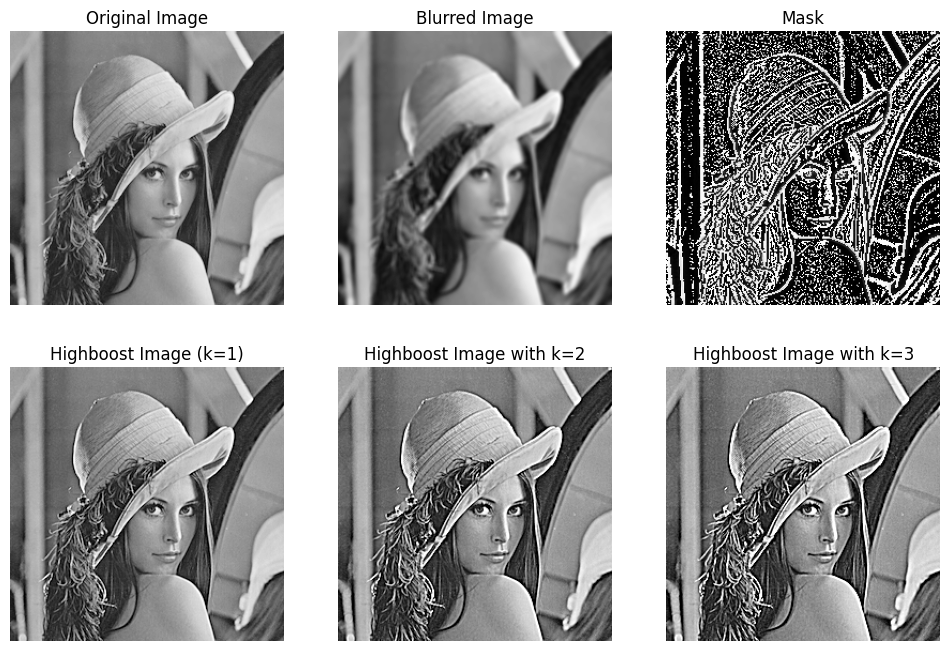

In [ ]:
def highboost(image, kernel_size=5, sigma=4, k=1):
    # The output highboost filtered image
    filtered_image = np.zeros_like(image)

    # The output Gaussian Blurred image
    blurred_image = np.zeros_like(image)

    # Ensure input is a float array to avoid rounding issues.
    image = image.astype(np.float32)

    ######### start of your code #########



    ######### end of your code #########

    return blurred_image, sharpened_image


img_data = read_img('lena.png')
blurred_image, filtered_image = highboost(img_data, sigma=2)
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_data, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_data - blurred_image, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(filtered_image, cmap='gray')
plt.title('Highboost Image (k=1)')
plt.axis('off')

blurred_image, filtered_image = highboost(img_data, k=2)
plt.subplot(2, 3, 5)
plt.imshow(filtered_image, cmap='gray')
plt.title('Highboost Image with k=2')
plt.axis('off')

blurred_image, filtered_image = highboost(img_data, k=3)
plt.subplot(2, 3, 6)
plt.imshow(filtered_image, cmap='gray')
plt.title('Highboost Image with k=3')
plt.axis('off')

plt.show()

# Task 4 Frequency Domain Filtering
Complete the function `gaussian_lowpass_filtering` to apply the Gaussian lowpass filter (GLPF) in the frequency domain.

You are allowed to use fft functions of numpy, but no direct implementation of GLPF.

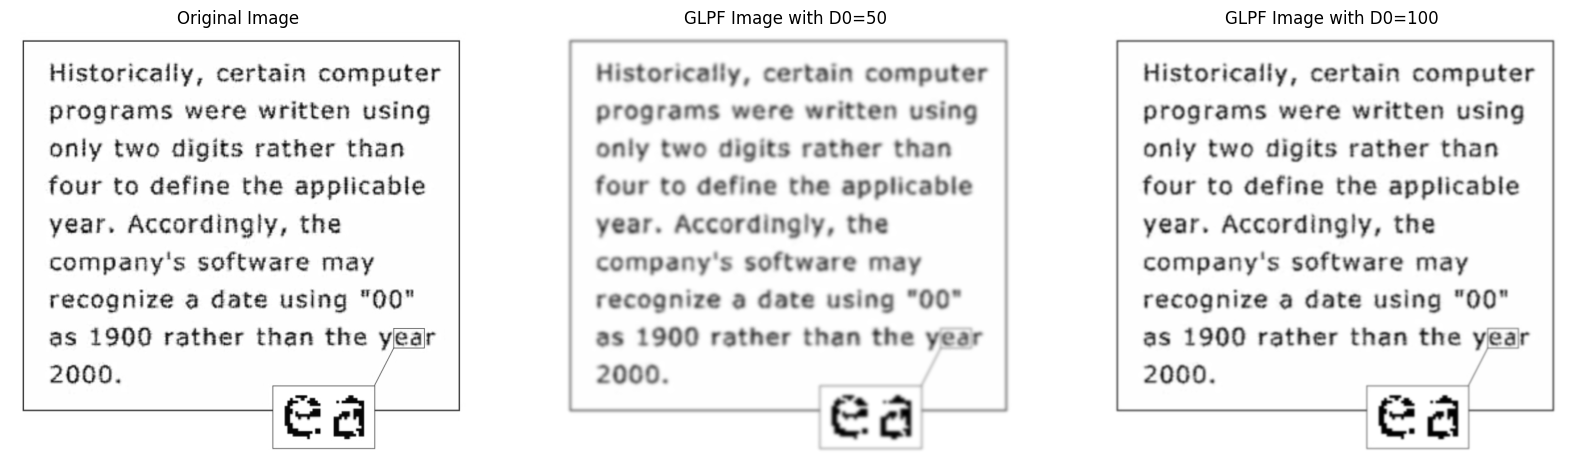

In [2]:
def gaussian_lowpass_filtering(image, D_0=50):
    # The output filtered image
    filtered_image = image

    # FFT: Transform the image to the frequency domain
    freq_domain = np.fft.fft2(image)

    ######### start of your code #########



    ######### end of your code #########

    # IFFT: Transform back to the spatial domain
    filtered_image = np.fft.ifft2(filtered_image)

    # Take the real part as the filtered_image
    filtered_image = np.real(filtered_image)

    return filtered_image

img_data = read_img('task4.png')

filter_image_1 = gaussian_lowpass_filtering(img_data, D_0=50)
filter_image_2 = gaussian_lowpass_filtering(img_data, D_0=100)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_data, 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filter_image_1, 'gray')
plt.title('GLPF Image with D0=50')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filter_image_2, 'gray')
plt.title('GLPF Image with D0=100')
plt.axis('off')

plt.show()
